# With this jupyter notebook you can qualitative evaluate the performance of your algorithm

In [21]:
'''Import the dependencies'''
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Computer Modern Roman"
import copy
from matplotlib.colorbar import Colorbar
from skimage.color import rgb2gray, gray2rgb
import logging

Set the root directory of your project

In [30]:
root_dir = "/home/dominik/Documents/InstantDL_dev_lsd/Vessel12/"
#root_dir = "/media/dominik/PIPE_BENCHM/Vessel/"
#root_dir = "/media/dominik/FertExperim/Vessel_3Losses/"

Running the next window it will execute Prepare_data_for_evaluation.py 
and save the data as numpy stacks to the insights folder

Setting max_images determines the number of images from the test-set which should be evaluated. 
Should be None, exept your memory is limited

In [31]:
max_images = 150
%run "/home/dominik/Documents/InstantDL_dev_lsd/instantdl/evaluation/Utils_data_evaluation.py"
prepare_data_for_evaluation(root_dir, max_images)

Loading the data from the numpy stacks

In [24]:
data_names = ["image", "image1", "image2", "image3", "prediction", "groundtruth", "abs_errormap", "uncertainty"]
datain = []
names = []
for name in data_names: 
    if os.path.isfile(root_dir + "insights/" + name + ".npy"):   
        import_data = np.array(np.load(root_dir + "insights/" + name + ".npy").astype('float'))
        #logging.info(name, np.shape(import_data))
        datain.append(import_data)
        names.append(str(name))
data = np.array(datain)
image_names = np.load(root_dir + "insights/image_names.npy")
#logging.info(names)
#logging.info(np.shape(data))

In [25]:
'''Function to save 2D images '''
from mpl_toolkits.axes_grid1 import make_axes_locatable
def save_2Dimages(data, names, z_index, path_name, image_name):
    logging.info("plot len data")
    logging.info(len(data))
    plt.figure(figsize = (len(data)*8,10))
    grid = plt.GridSpec(4, len(data), height_ratios=[0.01,0.3,0.02,0.01], width_ratios=len(data) * [1])
    logging.info("shape data save")
    logging.info(np.shape(data))
    for img, image in enumerate(data):
        shape = np.shape(image)
        #logging.info("shape plot image", np.shape(image))
        plts = plt.subplot(grid[0:2, img])
        if names[img] == "abs_errormap":
            max_val = np.max(np.abs(image))
            pltcberror = plt.title("errormap", size = 50)
            pltcberror = plt.imshow(rgb2gray(image), cmap='seismic', vmin = -max_val, vmax = max_val)
        elif names[img] == "uncertainty":
            plts = plt.title(names[img] + str(np.mean(image)), size = 50)
            max_val = np.max(np.abs(image))
            pltcbunc = plt.title("uncertainty", size = 50)
            pltcbunc = plt.imshow(np.max(image)-rgb2gray(image), cmap='Greys', vmin = -max_val, vmax = max_val)
        else:
            plts = plt.imshow(rgb2gray(image), cmap='Greys')
            plts = plt.title(names[img], size = 50)
            pltz = plt.xlabel("x (Pixel)", size=50)
        if img == 0:
            pltz = plt.ylabel("y (Pixel)", size=50)

        plts = plt.tick_params(labelsize=50)
        if img > 0:
            plts = plt.tick_params(
            axis='y',
            labelleft = False)
            plts = plt.tick_params(labelsize=50)
        if names[img] == "abs_errormap":
            logging.info("colorbar")
            if "uncertainty" in names:
                cbax = plt.subplot(grid[2:3,-2])
            else:
                cbax = plt.subplot(grid[2:3,-1])
            cbax = Colorbar(ax = cbax, mappable = pltcberror,orientation="horizontal")
            cbax.set_ticks([])
            cbax.set_label('Over-     Under- \n prediction', size = 50)
        if names[img] == "uncertainty":
            logging.info("colorbar uncertanty")
            cbay = plt.subplot(grid[2:3,-1])
            cbay = Colorbar(ax = cbay,  mappable = pltcbunc, orientation="horizontal")
            cbay.set_ticks([])
            cbay.set_label('Low         High', size = 50)
        plt.savefig(os.path.join(path_name, z_index + image_name + ".png"), dpi=50,bbox_inches='tight')
    plt.show()
    plt.close()

In [26]:
'''Function to save 3D images'''
def save_3Dimages(data, names, z_index, path_name, image_name):
    plt.figure(figsize=(len(data) * 8, 12))
    logging.info("plot len data", len(data))
    grid = plt.GridSpec(5, len(data), height_ratios=[0.01, 0.3, 0.1, 0.02, 0.01], width_ratios=len(data) * [1])

    logging.info("shape data save", np.shape(data))
    for img, image in enumerate(data):
        shape = np.shape(image)
        logging.info("shape image", np.shape(image))
        x_image = image[int(shape[0] / 2), ...]
        z_image = image[:, int(shape[1] / 2), :]
        logging.info("shape plot image", np.shape(x_image))
        plts = plt.subplot(grid[0:2, img])
        plts = plt.plot(np.arange(np.shape(x_image)[1]), [np.shape(x_image)[1] / 2] * np.shape(x_image)[1], color='0.5')
        plts = plt.title(names[img], size=50)
        plts = plt.tick_params(labelsize=50)
        plts = plt.xticks([])
        if img > 0:
            plts = plt.yticks([])
        if img == 0:
            plts = plt.ylabel("y (Pixel)", size=50)
            plts = plt.yticks(size=40)
        if names[img] == "abs_errormap":
            max_val = np.max(np.abs(x_image))
            pltcberror = plt.imshow(rgb2gray(x_image), cmap='seismic', vmin=-max_val, vmax=max_val)
            pltcberror = plt.subplot(grid[2, img])
            pltcberror = plt.plot(np.arange(np.shape(z_image)[1]), [np.shape(z_image)[0] / 2] * np.shape(z_image)[1],
                                  color='0.5')
        elif names[img] == "uncertainty":
            max_val = np.max(np.abs(x_image))
            pltcbunc = plt.title("uncertainty", size=50)
            pltcunc = plt.imshow(rgb2gray(x_image), cmap='Greys', vmin=-max_val, vmax=max_val)
            pltcunc = plt.subplot(grid[2, img])
            pltcunc = plt.plot(np.arange(np.shape(z_image)[1]), [np.shape(z_image)[0] / 2] * np.shape(z_image)[1],
                               color='0.5')
        else:
            pltxz = plt.imshow(x_image, cmap='Greys')
            pltxz = plt.subplot(grid[2, img])
            pltxz = plt.plot(np.arange(np.shape(z_image)[1]), [np.shape(z_image)[0] / 2] * np.shape(z_image)[1],
                             color='0.5')
        if img > 0:
            pltxy = plt.tick_params(axis='y', labelleft=False)
            pltxy = plt.tick_params(labelsize=40)
            pltxz = plt.yticks([])
        if img == 0:
            pltxz = plt.ylabel("y (Pixel)", size=50)
        if names[img] == "abs_errormap":
            max_val = np.max(np.abs(x_image))
            pltcerror = plt.imshow(rgb2gray(z_image), cmap='seismic', vmin=-max_val, vmax=max_val)
            pltcberror = plt.yticks([])
        elif names[img] == "uncertainty":
            max_val = np.max(np.abs(x_image))
            pltcunc = plt.imshow(rgb2gray(np.max(z_image) - z_image), cmap='Greys', vmin=-max_val, vmax=max_val)
        else:
            pltz = plt.imshow(z_image, cmap='Greys')
            pltz = plt.tick_params(labelsize=40)
            pltz = plt.xlabel("x (Pixel)", size=50)
        if img == 0:
            pltz = plt.ylabel("z (Pixel)", size=50)
        if img > 0:
            pltz = plt.tick_params(axis='y', labelleft=False, labelsize=40)
        # pltz = plt.tick_params(labelsize=40)

In [27]:
def threshold(img): 
    img[img < np.mean(img)] = 0
    return img

In [28]:
def normalize(img): 
    minimg = np.min(img)
    maximg = np.max(img)
    img = (img - minimg)/(maximg-minimg)
    return img

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U22'), dtype('<U22')) -> dtype('<U22')

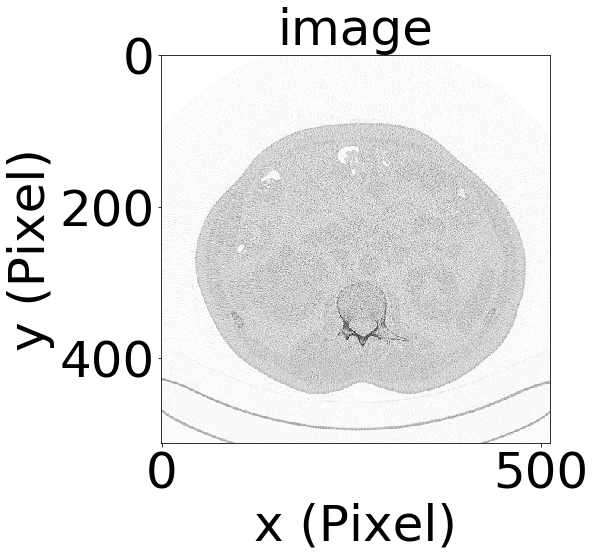

In [29]:
'''Function to execute image generation and saving'''
os.makedirs(root_dir + "/evaluation/", exist_ok=True)

#Threshold the uncertainty map to obtain more meaningful images    
if "uncertainty" in names: 
    data[names.index("uncertainty")] = threshold(data[names.index("uncertainty")])

for index, image in enumerate(data):   
    if names[index] not in ["abs_errormap"]:
        if names[index] not in ["abs_errormap"]:
            logging.info(index)
            logging.info(np.mean(np.mean(image)))
            logging.info(np.shape(image))
            data[index,...] = normalize(data[index,...])

names_out = copy.deepcopy(names)
report_dir = root_dir + "evaluation/"
logging.info("Length of data", len(data))   
if len(np.shape(data[0])) == 3 or len(np.shape(data[0])) == 4 and np.shape(data[0])[-1]==3:
    for index in range(len(data[0])):
        logging.info("index", index)
        logging.info("saving 2D image")
        '''Taking the slices in z-dimension one after another'''
        save_2Dimages(np.array(data)[:,index,...], names, str(index),report_dir, image_names)

if len(np.shape(data[0])) == 5 or len(np.shape(data[0])) == 5 and np.shape(data[0])[-1]==4:
    for index in range(len(data[1])):
        logging.info(index)
        logging.info("saving 3D image")
        '''Taking the slices in z-dimension one after another'''
        logging.info("data shape", np.shape(np.array(data)))
        save_3Dimages(np.array(data)[:,index,...], names, report_dir, str(index), image_names)